# Tutorial 5:Clustering Analysis 

## Question 1:  K-means Clustering

The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would
partition the input data into *k* disjoint clusters by iteratively applying the following two steps:
    
1. Form *k* clusters by assigning each instance to its nearest centroid.

2. Recompute the centroid of each cluster.

We will use sample movie ratings dataset to perform k-means clustering.

__Step 1: Generate sample movie rating__

**<font color="red">Code:</font>**

In [1]:
import pandas as pd

ratings = [['Forest',5,5,2,1],['Jeannie',4,5,3,2],['Malcom',4,4,4,3],['Sye Loong',2,2,4,5],['CaoQi',1,2,3,4],['Ryan',2,1,5,5]]
titles = ['user','Avenger','X-Men','The Ring','Train to Busan']
movies = pd.DataFrame(ratings,columns=titles)
movies

,user,Avenger,X-Men,The Ring,Train to Busan
0,Forest,5,5,2,1
1,Jeannie,4,5,3,2
2,Malcom,4,4,4,3
3,Sye Loong,2,2,4,5
4,CaoQi,1,2,3,4
5,Ryan,2,1,5,5


**<font color="blue">Observation:</font>**

The first 3 users liked action movies (Avenger and X-Men) while the last 3 users enjoyed horror movies (The Ring and Train to Busan). 

Our objective is to apply **k-means clustering** on the users to identify groups of users with **similar movie preferences**.

The example below shows how to apply k-means clustering (with **k=2**) on the **multidimensional(4 features)** movie ratings data. 

We must **remove the "user"** column first before applying the clustering algorithm. 

The **cluster assignment** for each user will be displayed as a dataframe object.

1.73205, Forest compare with jeannie. d(Forest,Jeannie)= (5-4)^2+(5-5)^2+(2-3)^2+(1-2)^2 = ans. Then square root the ans.

In [2]:
from scipy.spatial import distance

dat = movies.drop('user',axis=1)
#Compute distance between each pair of the two collections of inputs.
dis = distance.cdist(dat, dat, 'euclidean')
print(dis)

[[0.         1.73205081 3.16227766 6.164414   5.91607978 7.07106781]
 [1.73205081 0.         1.73205081 4.79583152 4.69041576 5.74456265]
 [3.16227766 1.73205081 0.         3.46410162 3.87298335 4.24264069]
 [6.164414   4.79583152 3.46410162 0.         1.73205081 1.41421356]
 [5.91607978 4.69041576 3.87298335 1.73205081 0.         2.64575131]
 [7.07106781 5.74456265 4.24264069 1.41421356 2.64575131 0.        ]]


__Step 2: Remove useless feature 'user' and perform clustering with k=2__

**<font color="red">Code:</font>**

In [3]:
from sklearn import cluster

data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
print('labels:', labels)
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

labels: [1 1 1 0 0 0]


,Cluster ID
user,
Forest,1
Jeannie,1
Malcom,1
Sye Loong,0
CaoQi,0
Ryan,0


**<font color="blue">Observation:</font>**

The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the 
second cluster. 

The results are consistent with our expectation. We can also **display the centroid** for each of the 
two clusters. 

**<font color="blue">Do you know how the means is being calculated and cluster is being formed?</font>**

__Step 3: Show the centroid(mean)__

**<font color="red">Code:</font>**
Cluster 1, Train to Busan is 2 because 1+2+3/3=2

In [4]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Avenger,X-Men,The Ring,Train to Busan
0,1.666667,1.666667,4.0,4.666667
1,4.333333,4.666667,3.0,2.000000


**<font color="blue">Observation:</font>**

Observe that cluster **1** has higher ratings for the **horror** movies whereas cluster **0** has higher ratings for **action** movies. 

The cluster centroids can be applied to other users to determine their cluster assignments.

__Step 4 : Test new data__

**<font color="red">Code:</font>**

In [5]:
import numpy as np

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1) # -1: the unspecified value will inferred
usernames = np.array(['Lawrence','Alicia','Jacob','Thiru','Ifa']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

c:\Users\GOH BOON CHUN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,user,Avenger,X-Men,The Ring,Train to Busan,Cluster ID
0,Lawrence,4,5,1,2,1
1,Alicia,3,2,4,4,0
2,Jacob,2,3,4,1,1
3,Thiru,3,2,3,3,0
4,Ifa,5,4,1,4,1


__Step 5 : Determine the optimal choice of k that minimize the error__

**<font color="blue">Observation:</font>**


To determine the number of clusters in the data, we can apply k-means with varying number of clusters from 1 to 6 and compute their corresponding sum-of-squared errors (SSE) as shown below. 

The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

**<font color="red">Code:</font>**

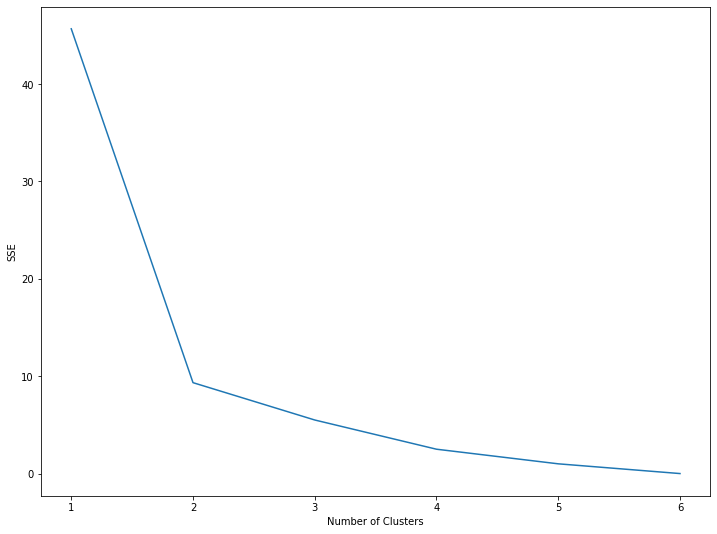

In [6]:
import matplotlib.pyplot as plt

# Make plot outputs appear and be stored within the notebook
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,9) # The default value of the figsize parameter is [6.4, 4.8]

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_) # Sum of squared distances of samples to their closest cluster center

plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.plot(numClusters, SSE)

Cluster = 2 . Because 2 is the optimal K-mean. Number of 3 to 6 no much difference.

**<font color="blue">Observation:</font>**

The knee point at k = 2 (2 clusters) gives the breakpoint where error decrease gently.

## Question 2: Hierarchical Clustering

Exploration of hierarchical clustering algorithms on

1) single link (MIN) 

2) complete link (MAX)

3) group average 


__Step 1 : Import the dataset on mammal classification , T6_vertebate.csv__

**<font color="red">Code:</font>**

In [7]:
import pandas as pd

data = pd.read_csv('T5_Q2_vertebrate.csv', header='infer')
print (data.shape)
data

(15, 8)


,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


__1) Single Link (MIN)__

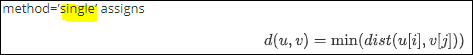

__Step 2 : Import cluster.hierachy libary from scipy__
    
1) Drop the feature 'name' and label 'class'

2) Fit the data and activate single (min distance between two clusters) algorithm 

3) plot the dendrogram

**<font color="red">Code:</font>**

(14, 4)


array([[ 0.        ,  8.        ,  0.        ,  2.        ],
       [ 2.        , 13.        ,  0.        ,  2.        ],
       [ 4.        , 14.        ,  0.        ,  2.        ],
       [12.        , 15.        ,  1.        ,  3.        ],
       [ 6.        , 18.        ,  1.        ,  4.        ],
       [ 3.        ,  9.        ,  1.        ,  2.        ],
       [16.        , 20.        ,  1.        ,  4.        ],
       [10.        , 21.        ,  1.        ,  5.        ],
       [17.        , 22.        ,  1.        ,  7.        ],
       [ 5.        , 23.        ,  1.        ,  8.        ],
       [11.        , 24.        ,  1.        ,  9.        ],
       [19.        , 25.        ,  1.41421356, 13.        ],
       [ 1.        , 26.        ,  1.41421356, 14.        ],
       [ 7.        , 27.        ,  1.41421356, 15.        ]])

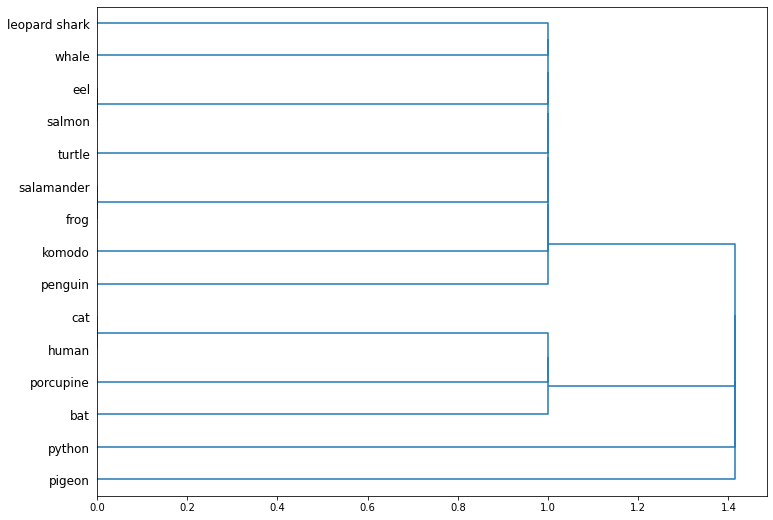

In [8]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,9) # The default value of the figsize parameter is [6.4, 4.8]

names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
Z = hierarchy.linkage(X, 'single') #An (n−1) by 4 matrix Z is returned
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
print(Z.shape)
Z

**<font color="blue">Note:</font>**

An (n−1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the n original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

Shape of linkage matrix (Z in the above cell) is (n-1) by 4

The first two values tell us which clusters were used to create cluster

The third value gives the distance between the clusters

The fourth value tells how many singletons are in cluster

**<font color="blue">Observation:</font>**

Can you observe clustering is done by **minimum** distance between features?

__2) Complete link (Max)__
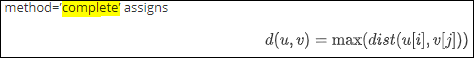

__Step 3: Fit the data and activate complete (max distance between two clusters)__

**<font color="red">Code:</font>**

(14, 4)


array([[ 0.        ,  8.        ,  0.        ,  2.        ],
       [ 2.        , 13.        ,  0.        ,  2.        ],
       [ 4.        , 14.        ,  0.        ,  2.        ],
       [ 5.        , 10.        ,  1.        ,  2.        ],
       [ 9.        , 16.        ,  1.        ,  3.        ],
       [12.        , 15.        ,  1.        ,  3.        ],
       [ 1.        , 17.        ,  1.41421356,  3.        ],
       [ 3.        , 11.        ,  1.41421356,  2.        ],
       [ 6.        ,  7.        ,  1.41421356,  2.        ],
       [20.        , 23.        ,  1.73205081,  5.        ],
       [18.        , 19.        ,  1.73205081,  5.        ],
       [21.        , 25.        ,  1.73205081,  8.        ],
       [22.        , 24.        ,  2.        ,  7.        ],
       [26.        , 27.        ,  2.44948974, 15.        ]])

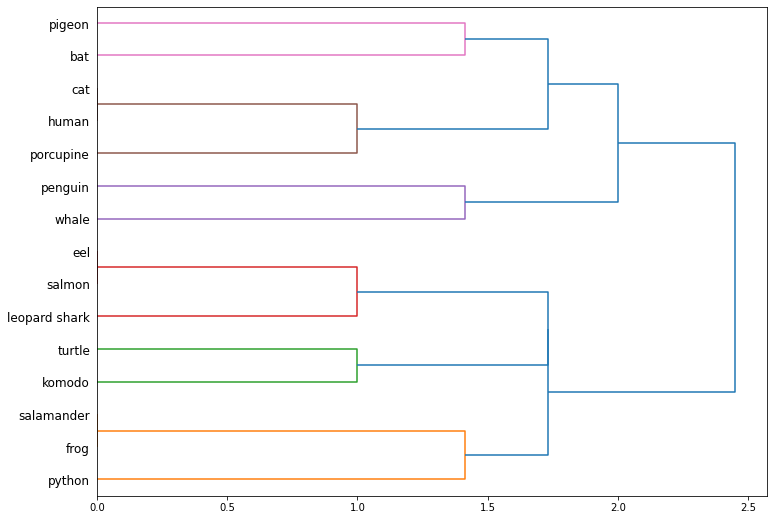

In [9]:
Z = hierarchy.linkage(X, 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
print(Z.shape)
Z

**<font color="blue">Observation:</font>** 

Can you observe clustering is done by **max** distance between features?

__3) Group Average__
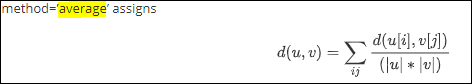

__Step 4: Fit the data and activate group average (take all distances between two clusters and average it)__

**<font color="red">Code:</font>**

array([[ 0.        ,  8.        ,  0.        ,  2.        ],
       [ 2.        , 13.        ,  0.        ,  2.        ],
       [ 4.        , 14.        ,  0.        ,  2.        ],
       [ 5.        , 10.        ,  1.        ,  2.        ],
       [ 9.        , 16.        ,  1.        ,  3.        ],
       [ 6.        , 12.        ,  1.        ,  2.        ],
       [17.        , 18.        ,  1.20710678,  4.        ],
       [15.        , 20.        ,  1.20710678,  4.        ],
       [ 3.        , 19.        ,  1.27614237,  4.        ],
       [11.        , 21.        ,  1.31066017,  5.        ],
       [ 7.        , 22.        ,  1.49367287,  5.        ],
       [23.        , 24.        ,  1.54011948,  9.        ],
       [ 1.        , 26.        ,  1.61501883, 10.        ],
       [25.        , 27.        ,  1.88891174, 15.        ]])

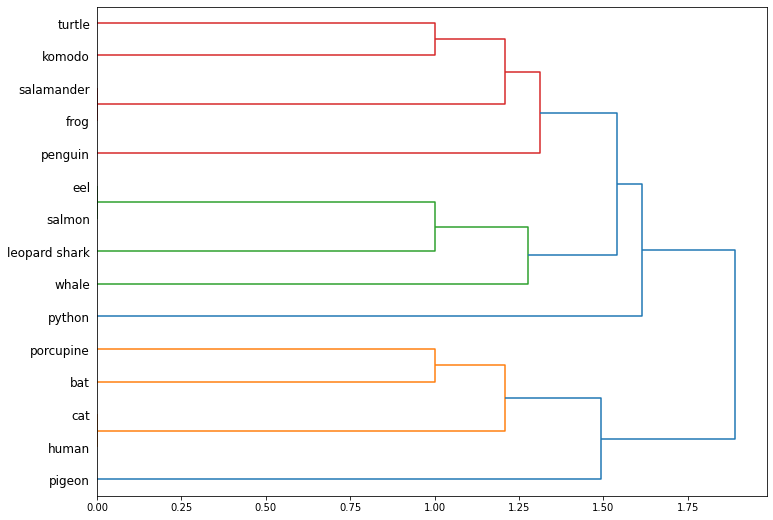

In [10]:
Z = hierarchy.linkage(X, 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
Z

**<font color="blue">Observation:</font>** 

Can you observe clustering is done by **average** distance between features?